In [1]:
#!pip install tensorflow==2.8.0
import pandas as pd
import numpy as np
import torch
import cv2
from google.colab.patches import cv2_imshow
import zipfile

In [2]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
tensorflow.__version__

'2.8.0'

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
path = "/content/gdrive/MyDrive/Arquivos reconhecimento facial/Material.zip"
zip_file = zipfile.ZipFile(file = path, mode = 'r')
zip_file.extractall('./')
zip_file.close()

In [6]:
haar_cascade = "/content/Material/haarcascade_frontalface_default.xml"
model_path = "/content/Material/modelo_01_expressoes.h5"
face_detector = cv2.CascadeClassifier(haar_cascade)
emotion_classifier = load_model(model_path, compile = False)
emotions = ["Anger", "Disgust", "Fear", "Happines", "Sadness", "Surprise", "Neutral"]

In [7]:
def detect_emotions(original):
  image = original.copy()
  faces = face_detector.detectMultiScale(image, scaleFactor = 1.1, minNeighbors = 3, minSize = (20,20))
  cut_faces = []
  for x, y, w, h in faces:
    gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cut_face = gray_scale[y:y+h, x:x+w]
    # cv2_imshow(cut_face)
    cut_face = cv2.resize(cut_face, (48,48))
    cut_face = img_to_array(cut_face, dtype=np.float32) / 255
    cut_faces.append(cut_face)

  cut_faces = np.array(cut_faces)
  predictions = emotion_classifier(cut_faces)
  for index, (x, y, w, h) in enumerate(faces):
    cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)
    cv2.putText(image, emotions[np.argmax(predictions[index])],  (x, y - 10), cv2.FONT_HERSHEY_COMPLEX, 0.45, (0,0,255), 1, cv2.LINE_AA)

  return image

In [8]:
webcam = cv2.VideoCapture(0)

In [9]:
while True:
  _, image = webcam.read()
  img = detect_emotions(image)
  cv2_imshow(image)

AttributeError: 'NoneType' object has no attribute 'copy'

In [10]:
image = cv2.imread("/content/Material/testes/teste01.png")
faces = face_detector.detectMultiScale(image, scaleFactor = 1.1, minNeighbors = 3, minSize = (20,20))

In [11]:
import os
directory = "/content/Material/testes/"
images = []
for img_file in os.listdir(directory):
  images.append(cv2.imread(directory + img_file))

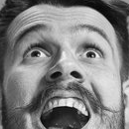

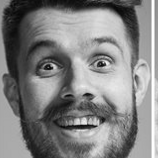

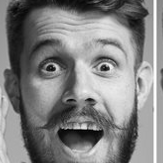

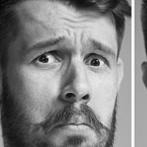

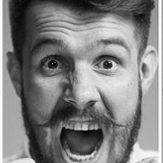

In [12]:
cut_faces = []
for x, y, w, h in faces:
  gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  cut_face = gray_scale[y:y+h, x:x+w]
  cv2_imshow(cut_face)
  cut_face = cv2.resize(cut_face, (48,48))
  cut_face = img_to_array(cut_face, dtype=np.float32) / 255
  cut_faces.append(cut_face)


In [13]:
cut_faces = np.array(cut_faces)

In [14]:
predictions = emotion_classifier(cut_faces)

In [15]:
for predict in predictions:
  print(emotions[np.argmax(predict)])

Happines
Happines
Surprise
Fear
Happines


In [16]:
for index, (x, y, w, h) in enumerate(faces):
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)
  cv2.putText(image, emotions[np.argmax(predictions[index])],  (x, y - 10), cv2.FONT_HERSHEY_COMPLEX, 0.45, (0,0,255), 1, cv2.LINE_AA)

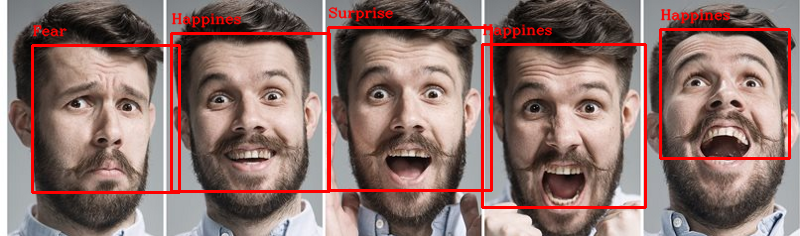

In [17]:
cv2_imshow(image)

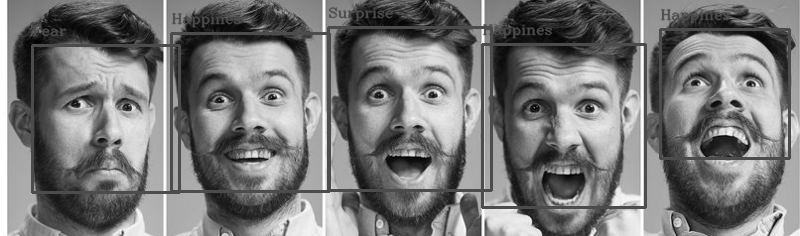

In [18]:
gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_scale)